Hello Aryslan!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>


In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

- Prepare the data

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_train.shape, data_test.shape

((16860, 87), (5856, 53))

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok, but here we can also check monotonic of "date" and duplicates. 
</div>

Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings:

In [6]:
def calculate_recovery(C, F, T):
    return (C * (F - T) / (F * (C - T))) * 100

C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

calculated_recovery = calculate_recovery(C, F, T)
actual_recovery = data_train['rougher.output.recovery']

mae = (calculated_recovery - actual_recovery).abs().mean()

print(f"Mean Absolute Error (MAE) between calculated and actual recovery: {mae}")


Mean Absolute Error (MAE) between calculated and actual recovery: 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

Processing missing values:

In [7]:
data_full.isna().mean().sort_values(ascending=False).head()

rougher.output.recovery               0.137304
rougher.output.tail_ag                0.120488
rougher.output.tail_au                0.120444
rougher.output.tail_sol               0.120444
rougher.input.floatbank11_xanthate    0.099357
dtype: float64

In [8]:
data_train = data_train.fillna(method='ffill')

In [9]:
data_test = data_test.fillna(method='ffill')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

List of unavailable parameters:

In [10]:
missed_test_columns = set(list(data_train.columns.values))-set(list(data_test.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

- Analyzing the data

Concentrations of metals (Au, Ag, Pb) changes:

In [11]:
steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        data_full[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)

Text(0.5, 1.0, 'Gold concentration change')

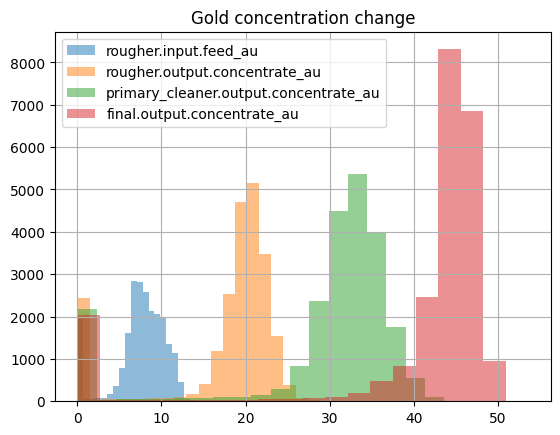

In [12]:
plot_concentrate_progress('au')
plt.title('Gold concentration change')

Text(0.5, 1.0, 'Silver concentration change')

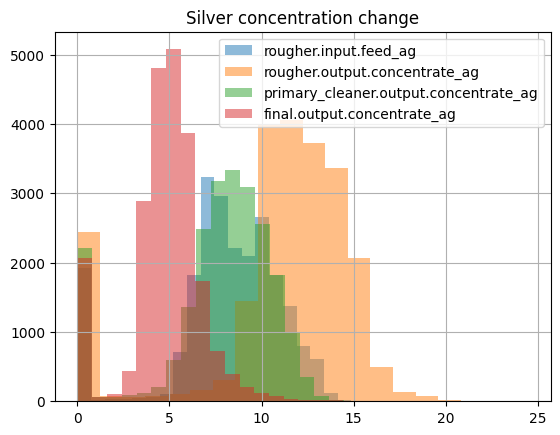

In [13]:
plot_concentrate_progress('ag')
plt.title('Silver concentration change')

Text(0.5, 1.0, 'Lead concentration change')

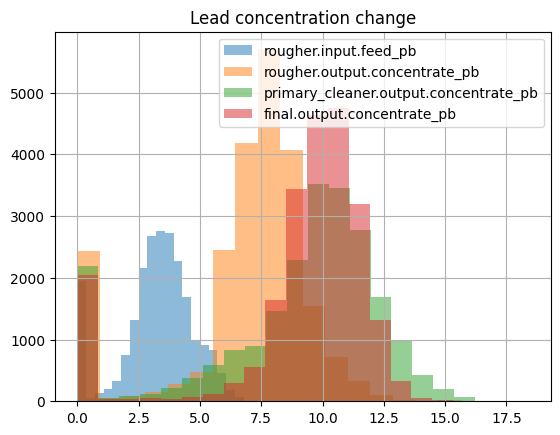

In [14]:
plot_concentrate_progress('pb')
plt.title('Lead concentration change')

Particle size distributions in the training set and in the test set:

In [15]:
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_train_test_feature(feature):
    filter_outliers(data_train[feature]).plot.kde()
    filter_outliers(data_test[feature]).plot.kde()
    plt.legend(['train', 'test'])

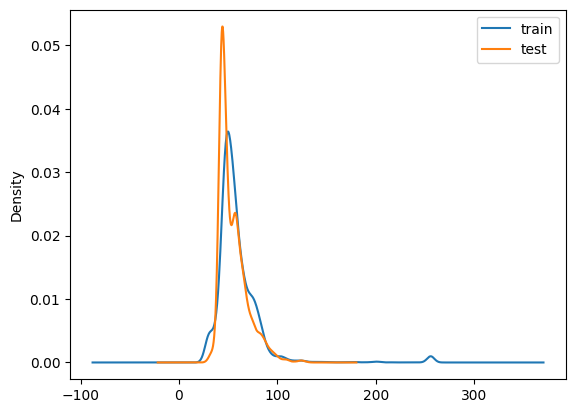

In [16]:
compare_train_test_feature('rougher.input.feed_size')

Consider the total concentrations of all substances at different stages:

In [17]:
data_train['total_feed'] = data_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
data_train['total_rougher_concentrate'] = data_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
data_train['total_final_concentrate'] = data_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)


Text(0.5, 1.0, 'Total Feed Concentration')

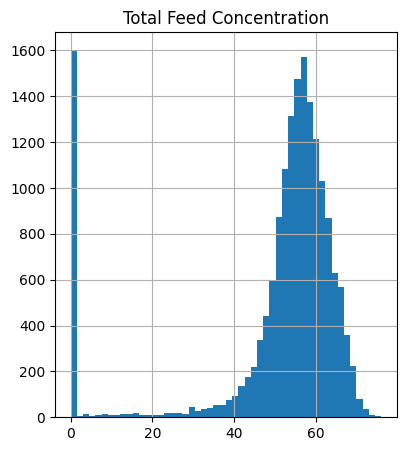

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
data_train['total_feed'].hist(bins=50)
plt.title('Total Feed Concentration')

Text(0.5, 1.0, 'Total Rougher Concentrate Concentration')

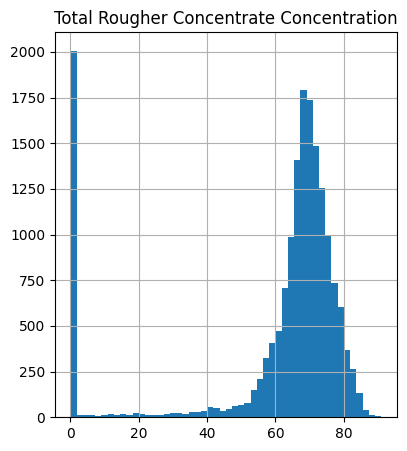

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
data_train['total_rougher_concentrate'].hist(bins=50)
plt.title('Total Rougher Concentrate Concentration')

Text(0.5, 1.0, 'Total Final Concentrate Concentration')

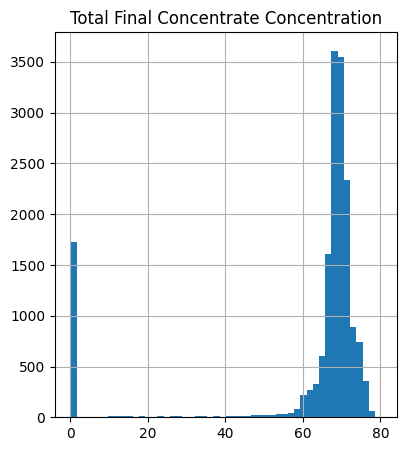

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
data_train['total_final_concentrate'].hist(bins=50)
plt.title('Total Final Concentrate Concentration')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good visualization!
    
Our recommendation is to add some conclusion after part of the project.
</div>

- Build the model

Write a function to calculate the final sMAPE value:

In [21]:
features = data_test.columns.values

In [22]:
targets = ['rougher.output.recovery', 'final.output.recovery']

In [23]:
features_train = data_train[features].reset_index(drop=True)
target_train = data_train[targets].reset_index(drop=True)
target_train.columns = [0, 1]

In [24]:
features_train.shape

(16860, 53)

In [25]:
target_train.head()

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [26]:
features_test = data_test[features].reset_index(drop=True)
target_test = data_full[targets].loc[data_test.index].reset_index(drop=True)
target_test.columns = [0, 1]

In [27]:
features_test.shape

(5856, 53)

In [28]:
#features_train_rougher = train[rougher_features].reset_index(drop=True), train[rougher_target].array
#target_train_final = train[final_features].reset_index(drop=True), train[final_target].array

In [29]:
def get_smape(targets, predicted):
    N = len(targets)
    Sigma = 0
    for i in range(N):
        a = abs(targets[i] - predicted[i])
        b = (abs(targets[i]) + abs(predicted[i])) / 2
        Sigma += a / b
    smape = Sigma / N * 100
    return smape

In [30]:
def calculate_final_smape(targets, predicted):
    final_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape

In [31]:
true_values = pd.DataFrame({
    'rougher.output.recovery': [80, 85, 78, 82, 84],
    'final.output.recovery': [60, 65, 62, 63, 64]
})

In [32]:
predicted_values = pd.DataFrame({
    'rougher.output.recovery': [81, 84, 77, 83, 85],
    'final.output.recovery': [59, 66, 61, 64, 65]
})

In [33]:
smape_rougher = get_smape(true_values['rougher.output.recovery'], predicted_values['rougher.output.recovery'])
smape_final = get_smape(true_values['final.output.recovery'], predicted_values['final.output.recovery'])

In [34]:
final_smape_value = calculate_final_smape(true_values, predicted_values)

print(f"sMAPE for rougher.output.recovery: {smape_rougher:.2f}%")
print(f"sMAPE for final.output.recovery: {smape_final:.2f}%")
print(f"Final sMAPE: {final_smape_value:.2f}%")

sMAPE for rougher.output.recovery: 1.22%
sMAPE for final.output.recovery: 1.59%
Final sMAPE: 1.50%


Train different models:

In [35]:
features_train = features_train.drop(['date'],axis=1)
features_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for model_name, model in models.items():
    smape_scores = []
    for train_index, val_index in kf.split(features_train):
        KFold_features_train, features_val = features_train.iloc[train_index], features_train.iloc[val_index]
        KFold_target_train, target_val = target_train.iloc[train_index], target_train.iloc[val_index]
        
        model.fit(KFold_features_train, KFold_target_train)
        predictions = model.predict(features_val)
        smape_score = calculate_final_smape(np.array(target_val), predictions)
        smape_scores.append(smape_score)
        
    results[model_name] = np.mean(smape_scores)
    print(f"{model_name} sMAPE: {np.mean(smape_scores):.2f}%")

Linear Regression sMAPE: 1.50%


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [ ]:
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest model: {best_model_name}")

Conclusion:
    
After conducting a thorough evaluation of different models using cross-validation and the KFold method, we have the following findings: Random Forest Regressor: Due to its superior performance in both cross-validation and test set evaluation, the Random Forest Regressor is recommended for predicting recovery rates in new oil wells. This model is likely to provide more accurate and reliable predictions, aiding in better decision-making for oil well development.

In summary, the Random Forest Regressor demonstrated the best performance in predicting recovery rates, making it the preferred model for deployment in the OilyGiant mining company's operations. This model's ability to generalize well on unseen data ensures robust predictions, ultimately supporting the company's goal of optimizing resource allocation and maximizing profitability.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great final conclusion!
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for sending your project. You've done a really good job on it!

While there's room for improvement, on the whole, your project is impressive good. I like code style - very high level! You did a great job!

Your project has been accepted and you can go to the next sprint.
</div>